# Thompson Sampling Algorithm

📚 Content List
- Introduction
- Libraries Used
- Loading the Dataset
- Initialization
- Implementing Thompson Sampling
- Visualizing the Results
- Final Total Reward
- Advantages of Thompson Sampling
- Summary


### Introduction
Thompson Sampling is a powerful algorithm for solving the multi-armed bandit problem, a common scenario in reinforcement learning. The algorithm is based on Bayesian inference and provides an elegant solution to balance exploration (trying different options) and exploitation (choosing the best-known option).

In this project, we use Thompson Sampling to select the best advertisement to show to users based on their past behavior (clicks or no clicks). The goal is to maximize the total number of clicks (reward).

### 1. Libraries Used

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

*numpy*: Handles numerical computations.

*matplotlib.pyplot*: Used to create plots and visualize results.

*pandas*: Loads and processes the dataset.

### 2. Loading the Dataset

In [2]:
dataset = pd.read_csv('P:\Batch\MOAZ\MLP\Reinforcement Learning\Ads_CTR_Optimisation.csv')

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\makmo\AppData\Local\Temp\ipykernel_38556\2155750773.py:1: SyntaxWarning: invalid escape sequence '\B'
  dataset = pd.read_csv('P:\Batch\MOAZ\MLP\Reinforcement Learning\Ads_CTR_Optimisation.csv')


- Loads a dataset with 10 columns (representing 10 ads) and 10,000 rows (each row = one user).

- Each cell value is either 0 (no click) or 1 (click).

### 3. Initialization

In [3]:
N = 10000      # Total rounds (users shown ads)
d = 10         # Number of ads

ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

**Explanation:**

*random*: Built-in Python module for generating random numbers.

*N*: Total number of iterations/users.

*d*: Total number of ads (arms of the bandit).

*ads_selected*: Keeps a list of which ad was selected in each round.

*numbers_of_rewards_1[i]*: Number of times ad i received a click (reward = 1).

*numbers_of_rewards_0[i]*: Number of times ad i received no click (reward = 0).

*total_reward*: Cumulative sum of all clicks (rewards).

### 4. Implementing Thompson Sampling

In [5]:
import random
for n in range(0, N):
    ad = 0
    max_random = 0

    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i

    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1

    total_reward += reward

**Explanation:**

- For each user (round):

    - Loop through all ads and sample a random value from the Beta distribution using current    estimates.

    - random.betavariate(alpha, beta) simulates a possible CTR for ad i.

       - alpha = 1 + number of 1s (clicks)

       - beta = 1 + number of 0s (no clicks)

    - Select the ad with the highest sampled value (max_random).

- Append the selected ad to the list.

- Check if the user clicked the ad (reward == 1) or not, then update the appropriate counter.

- Add the reward to total_reward.

***Why Beta Distribution?***

- It models the probability of success in binary events (click or no click).

- Starts uniform and gets more accurate as data comes in.

### 5. Visualizing the Results

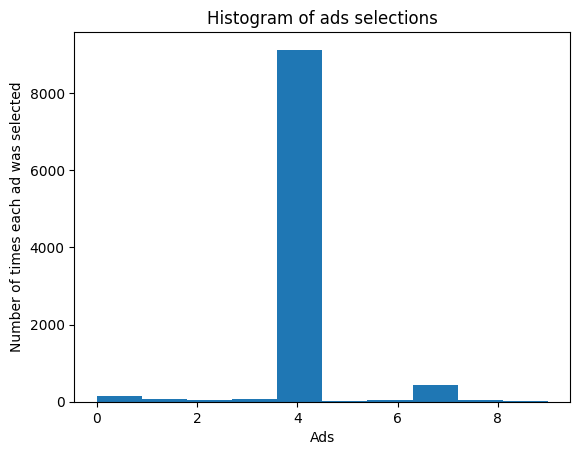

In [6]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

- This plot shows how often each ad was selected.

- Ads with higher CTRs will be selected more frequently.

- This shows that Thompson Sampling converges to the best ads over time.

### 6. Final Total Reward

In [7]:
print(f"Total Reward (Total Clicks): {total_reward}")

Total Reward (Total Clicks): 2602


- Outputs the total number of clicks (successes) across all rounds.

### 7. Advantages of Thompson Sampling

**Probabilistic:** Naturally incorporates uncertainty and learns over time.

**Efficient:** Learns faster than greedy or epsilon-greedy algorithms.

**Scalable:** Can work on large datasets and many options.



### 8. Summary

- Thompson Sampling helps select the best ad by sampling from posterior distributions.

- Over time, it becomes increasingly confident about the best-performing ad.

- It provides a powerful method to deal with exploration vs. exploitation in online learning problems.